<a href="https://colab.research.google.com/github/leesujin1209/BlockChain/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## k-최근접 이웃
# 크기와 무게에 따라 돔(bream)과 빙어(smelt)를 분류하는 문제

# 레이블, 함수와 같은 선수들이 쓰는 단어를 사용하자^^

산점도 (scatter plot)
- 두 특성을 숫자에서 그래프로 표현
- 길이를 x축, 무게를 y축
- 각 도미를 이 그래프에 점으로 표시

파이썬에서 과학 계산용 그래프를 그리는 대표적인 패키지는 맷플롯립(matplotlib)
- 이 패키지를 임포트하고 산점도를 그리는 scatter() 함수 사용
- 생선의 길이가 길수록 무게가 많이 나간며 이 그래프 모습은 양의 상관관계를 가지고 있다고 설명할 수 있음.
- 산점도 그래프가 일직선에 가까운 형태로 나타나는 경우를 선형적이라고 표현

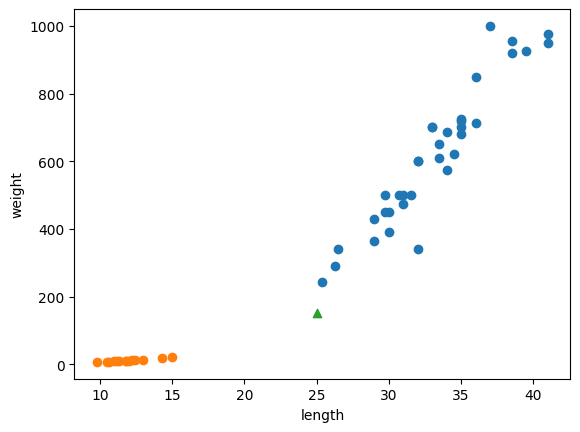

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

#print(bream_length)
#print(bream_weight)

import matplotlib.pyplot as plt  #matplotlib의 pylot 함수를 plt로 풀어서 사용

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')  # x축은 길이
plt.ylabel('weight')  # y축은 무게
plt.scatter(25, 150, marker='^')
plt.show()

In [ ]:
## 사이킷 런

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)  # 49를 넣으면 0.71...이 나오므로 정확도가 낮음

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l, w] for l, w in zip(length, weight)]
fish_target = [1]*35 + [0]*14             # 1은 돔, 0은 빙어로 라벨링
kn.fit(fish_data, fish_target)            # 학습, 훈련
print(kn.score(fish_data, fish_target))   # 테스트   1.0 출력: 둘 다 정답, 정확도 100%
print(kn.predict([[30, 600]]))            # 돔으로 예측됨. array([1]) / [0]은 빙어

# print가 빠지면 마지막 내용만 출력됨
# 다 출력하고 싶으면 print를 넣자!

1.0
[1]


n_neighbors가 홀수인게 좋음

49를 입력했을 때 70퍼센트가 나온 이유: 빙어[0]를 예측해보면


 predict를 ([12,20]) 처럼 매우 적은 숫자를 넣었을 때 값이 [0]이 된다.




In [ ]:
##완성 프로그램

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
length=bream_length+smelt_length
weight=bream_weight+smelt_weight
fish_data = [[l,w] for l, w in zip(length, weight)]
fish_target=[1]*35 + [0]*14
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)
print(kn.predict([[30, 600]]))
print(kn.predict([[10, 60]]))
#plt.scatter(bream_length, bream_weight)
#plt.scatter(smelt_length, smelt_weight)
#plt.xlabel('length')
#plt.ylabel('weight’)
#plt.scatter([30], [600], marker='*', color='blue')
#plt.scatter([10], [60], marker='*', color='red')
#plt.show()

[1]
[0]


[1]
[0]


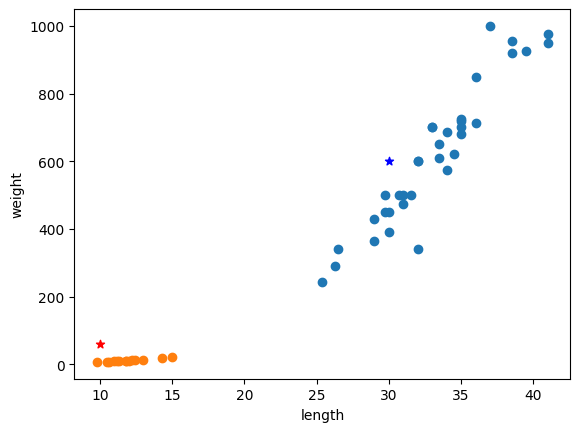

In [ ]:
##완성 프로그램

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
length=bream_length+smelt_length
weight=bream_weight+smelt_weight
fish_data = [[l,w] for l, w in zip(length, weight)]
fish_target=[1]*35 + [0]*14
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)
print(kn.predict([[30, 600]]))
print(kn.predict([[10, 60]]))
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.scatter([30], [600], marker='*', color='blue')
plt.scatter([10], [60], marker='*', color='red')
plt.show()